## Imports

In [193]:
import numpy as np
from qutip_qip.operations import Measurement
from qutip_qip.operations.gates import gate_sequence_product
from qutip_qip.qasm import read_qasm, print_qasm
import qutip as qt

Random circuits: https://docs.quantum.ibm.com/api/qiskit/circuit_random#random-circuits

In [194]:
#make a random quantum circuit with qiskit

from qiskit.circuit.random import random_clifford_circuit
 
qubit_count = 2
gate_count = 100

qiskit_circ = random_clifford_circuit(num_qubits=qubit_count, num_gates=gate_count)
qiskit_circ.draw()

┌──────┐┌──────┐      ┌──────┐┌───┐┌────────┐┌───┐         ┌──────┐      »
q_0: ┤ √Xdg ├┤0     ├──────┤0     ├┤ X ├┤0       ├┤ Z ├─────────┤1     ├──────»
     └──────┘│  Dcx │┌────┐│  Ecr │└─┬─┘│  Iswap │├───┴┐┌──────┐│  Dcx │┌────┐»
q_1: ────────┤1     ├┤ √X ├┤1     ├──■──┤1       ├┤ √X ├┤ √Xdg ├┤0     ├┤ √X ├»
             └──────┘└────┘└──────┘     └────────┘└────┘└──────┘└──────┘└────┘»
«     ┌──────┐┌──────┐┌────┐┌───┐┌──────┐┌──────┐┌───┐     ┌──────┐      ┌───┐»
«q_0: ┤0     ├┤1     ├┤ √X ├┤ Y ├┤ √Xdg ├┤0     ├┤ X ├──■──┤ √Xdg ├─X──X─┤ H ├»
«     │  Dcx ││  Ecr │└────┘└───┘└──────┘│  Ecr │└───┘┌─┴─┐└┬───┬─┘ │  │ └───┘»
«q_1: ┤1     ├┤0     ├───────────────────┤1     ├─────┤ X ├─┤ I ├───X──X──────»
«     └──────┘└──────┘                   └──────┘     └───┘ └───┘             »
«     ┌───┐┌───┐┌──────┐   ┌──────┐   ┌──────┐       ┌──────┐┌───┐     ┌──────┐»
«q_0: ┤ H ├┤ H ├┤1     ├─■─┤ √Xdg ├─X─┤1     ├───────┤1     ├┤ H ├──■──┤0     ├»
«     └───┘└───┘│  Dcx │ │ └──────┘ │ │  Ecr │┌─────┐│  Ecr │└───┘┌─┴─┐│  Dcx │»
«q_1: ──────────┤0     ├─■──────────X─┤0     ├┤ Sdg ├┤0     ├─────┤ X ├┤1     ├»
«               └──────┘              └──────┘└─────┘└──────┘     └───┘└──────┘»
«     ┌───┐┌────┐┌───┐┌───┐┌───┐┌──────┐   ┌───┐┌──────┐ ┌────┐┌───┐     »
«q_0: ┤ Y ├┤ √X ├┤ S ├┤ Y ├┤ S ├┤0     ├─■─┤ H ├┤0     ├─┤ √X ├┤ I ├──■──»
«     └─┬─┘├───┬┘└───┘└─┬─┘├───┤│  Dcx │ │ ├───┤│  Dcx │┌┴────┤├───┤┌─┴─┐»
«q_1: ──■──┤ S ├────────■──┤ S ├┤1     ├─■─┤ X ├┤1     ├┤ Sdg ├┤ I ├┤ X ├»
«          └───┘           └───┘└──────┘   └───┘└──────┘└─────┘└───┘└───┘»
«     ┌──────┐┌─────┐┌────────┐     ┌───┐        ┌───┐┌────┐┌─────┐┌───┐┌───┐»
«q_0: ┤1     ├┤ Sdg ├┤0       ├─────┤ Y ├────────┤ Y ├┤ √X ├┤ Sdg ├┤ S ├┤ S ├»
«     │  Dcx │└┬───┬┘│  Iswap │┌───┐└─┬─┘┌──────┐└─┬─┘└────┘└─────┘└───┘└───┘»
«q_1: ┤0     ├─┤ Z ├─┤1       ├┤ I ├──■──┤ √Xdg ├──■─────────────────────────»
«     └──────┘ └───┘ └────────┘└───┘     └──────┘                            »
«     ┌───┐┌───┐┌───┐┌───┐┌────────┐┌───┐┌───┐┌──────┐┌────────┐┌─────┐┌───┐   »
«q_0: ┤ X ├┤ Z ├┤ Y ├┤ Y ├┤1       ├┤ Y ├┤ Y ├┤1     ├┤1       ├┤ Sdg ├┤ I ├─■─»
«     └─┬─┘└───┘└───┘└─┬─┘│  Iswap │└─┬─┘└─┬─┘│  Dcx ││  Iswap │└┬───┬┘└───┘ │ »
«q_1: ──■──────────────■──┤0       ├──■────■──┤0     ├┤0       ├─┤ X ├───────■─»
«                         └────────┘          └──────┘└────────┘ └───┘         »
«     ┌───┐   ┌─────┐        ┌───┐┌─────┐┌───┐┌──────┐   ┌───┐┌───┐┌──────┐»
«q_0: ┤ H ├─X─┤ Sdg ├──■───X─┤ Z ├┤ Sdg ├┤ H ├┤0     ├─■─┤ Z ├┤ X ├┤ √Xdg ├»
«     └───┘ │ └─────┘┌─┴─┐ │ └───┘└─────┘└───┘│  Dcx │ │ ├───┤└───┘└──────┘»
«q_1: ──────X────────┤ Y ├─X──────────────────┤1     ├─■─┤ S ├─────────────»
«                    └───┘                    └──────┘   └───┘             »
«     ┌──────┐     ┌────────┐┌───┐┌────┐┌────┐┌──────┐   
«q_0: ┤1     ├─────┤1       ├┤ S ├┤ √X ├┤ √X ├┤ √Xdg ├─X─
«     │  Dcx │┌───┐│  Iswap │└───┘└────┘└────┘└──────┘ │ 
«q_1: ┤0     ├┤ I ├┤0       ├──────────────────────────X─
«     └──────┘└───┘└────────┘

Decompose this circuit before converting it to qasm to prevent errors with QuTiP

In [195]:
from qiskit.circuit.random import random_clifford_circuit
from qiskit import transpile
import warnings

def recursive_decompose(circuit, depth=8):
    for _ in range(depth):
        circuit = circuit.decompose()
    return circuit

qiskit_circ = recursive_decompose(qiskit_circ)


In [196]:
qiskit_basis_gates = [
    'rx', 'ry', 'rz',
    'h',          
    'p',         
    'cx',        
    'swap',
    'ccx'        
]

qiskit_circ = transpile(
    qiskit_circ,
    basis_gates=qiskit_basis_gates,
    optimization_level=3
)

In [197]:
qiskit_to_qutip = {
    'cx': 'cnot',
    'ccx': 'toffoli',
    'p': 'phasegate',
    'h': 'snot',  
}

Convert to qasm via Qiskit: https://docs.quantum.ibm.com/api/qiskit/qasm2#exporting-examples

In [198]:
import qiskit.qasm2
from qiskit.circuit import QuantumCircuit
 
print(qiskit.qasm2.dumps(qiskit_circ))

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
rx(0.3815253466324436) q[1];
cx q[0],q[1];
ry(-pi/2) q[0];
rz(pi/2) q[0];
rz(-pi/2) q[1];
ry(-1.1892709801624541) q[1];


In [199]:
#Now add it to a file for clarity

qiskit.qasm2.dump(qiskit_circ, "random_circuit.qasm")
path = "random_circuit.qasm"

## QASM Conversion 

### Read in the file to a string

In [200]:
with open(path, 'r') as file:
    qasm_str = file.read()

In [201]:
type(qasm_str)

str

### Append basic gate definitions to the string

For more definitions, see this repo: https://github.com/HQSquantumsimulations/qoqo_qasm/blob/aff4aba03ae12e12599ed11b98c9b7ecaef0c021/roqoqo-qasm/src/interface.rs#L1345

In [202]:
# Insert gate definitions after the 'include' line in qasm_str

swap_gate_def = [
    'gate swap a, b{',
    'cx b, a;',
    'cx a, b;',
    'cx b, a;',
    '}'
]

sx_gate_def = [
    'gate sx a {',
    'u1(-pi/2) a;',
    'u2(0,pi) a;',
    'u1(-pi/2) a;',
    '}'
]

sxdg_gate_def = [
    'gate sxdg a {',
    'u1(pi/2) a;',
    'u2(0,pi) a;',
    'u1(pi/2) a;',
    '}'
]

lines = qasm_str.splitlines()
for i, line in enumerate(lines):
    if line.strip().startswith('include'):
        insert_idx = i + 1
        break

gate_defs = swap_gate_def + [''] + sx_gate_def + [''] + sxdg_gate_def + ['']
lines[insert_idx:insert_idx] = gate_defs
qasm_str = '\n'.join(lines)

### Review the string using the built-in qasm to qutip conversion tools

In [203]:
qutip_circ = read_qasm(qasm_str, strmode=True)
gate_sequence_product(qutip_circ.propagators())

c:\Users\Owner\anaconda3\Lib\site-packages\qutip_qip\qasm.py:279: UserWarning: "qelib1.inc"not found, ignored.
  warnings.warn(command[1] + "not found, ignored.")


Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=False
Qobj data =
[[ 0.5+0.j   0. -0.5j  0. -0.5j  0.5+0.j ]
 [-0.5+0.j   0. -0.5j  0. -0.5j -0.5+0.j ]
 [ 0. -0.5j -0.5+0.j   0.5+0.j   0. +0.5j]
 [ 0. +0.5j -0.5+0.j   0.5+0.j   0. -0.5j]]

## Test to see if it works

In [204]:
# from qutip_qip.device import (LinearSpinChain, OptPulseProcessor, SCQubits,
#                               SpinChainModel)

# processor = LinearSpinChain(3)
# processor.load_circuit(qutip_circ)

# processor.plot_pulses()

In [205]:
type(gate_sequence_product(qutip_circ.propagators()))

quantum_object = gate_sequence_product(qutip_circ.propagators())

In [206]:
# Replace with your own Qobj
psi = qt.basis(2, 0)            # |0⟩ state
rho = quantum_object          # density matrix

# If you already have your state, say `your_qobj`, use:
# rho = your_qobj if your_qobj.isoper else ket2dm(your_qobj)

rho

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=False
Qobj data =
[[ 0.5+0.j   0. -0.5j  0. -0.5j  0.5+0.j ]
 [-0.5+0.j   0. -0.5j  0. -0.5j -0.5+0.j ]
 [ 0. -0.5j -0.5+0.j   0.5+0.j   0. +0.5j]
 [ 0. +0.5j -0.5+0.j   0.5+0.j   0. -0.5j]]

In [207]:
# import matplotlib.pyplot as plt
# from qutip.visualization import matrix_histogram
# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure(figsize=(12, 6))

# # Real part (3D)
# ax1 = fig.add_subplot(121, projection='3d')
# matrix_histogram(rho, ax=ax1, colorbar=True)
# ax1.set_title('Real Part')

# # Imaginary part (3D)
# ax2 = fig.add_subplot(122, projection='3d')
# matrix_histogram(rho, ax=ax2, colorbar=True)
# ax2.set_title('Imaginary Part')

# plt.tight_layout()
# plt.show()



In [208]:
# set a parameter to see animations in line
from matplotlib import rc
rc('animation', html='jshtml')

In [209]:
# initial state
initial_state = qt.tensor([qt.basis(2, 0) for _ in range(qubit_count)])

# list of times for which the solver should store the state vector
tlist = np.linspace(0, 10, 100)

result = qt.mesolve(quantum_object, initial_state, tlist, [], [])

c:\Users\Owner\anaconda3\Lib\site-packages\qutip\solver\solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


In [210]:
result

<Result
  Solver: sesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 0.0
    preparation time: 0.0
    run time: 0.001986980438232422
    solver: 'Schrodinger Evolution'
  Time interval: [0.0, 10.0] (100 steps)
  Number of e_ops: 0
  States saved.
>

In [211]:
# fig, ani = qt.anim_matrix_histogram(result, limits=[0, 1],
#                                  bar_style='abs', color_style='phase')
# # close an auto-generated plot and animation
# plt.close()

# ani

In [212]:
fig, ani = qt.anim_fock_distribution(result)
# close an auto-generated plot and animation
plt.close()
ani

ValueError: got 10 xlabels but needed 4

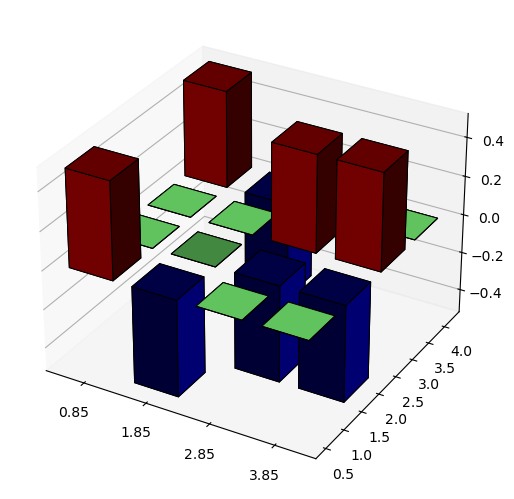

In [213]:
N = 5

lbls_list = [[str(d) for d in range(N)], ["u", "d"]]

xlabels = []

for inds in qt.tomography._index_permutations([len(lbls) for lbls in lbls_list]):
   xlabels.append("".join([lbls_list[k][inds[k]] for k in range(len(lbls_list))]))

fig, ax = qt.matrix_histogram(quantum_object, xlabels, xlabels, limits=[-4,4])

ax.view_init(azim=-55, elev=45)

plt.show()

c:\Users\Owner\anaconda3\Lib\site-packages\qutip\solver\solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


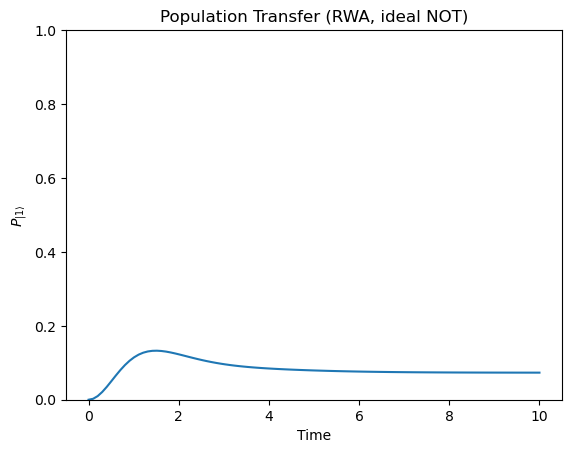

In [214]:
result = qt.mesolve(quantum_object, initial_state, tlist, [], [])
pop1 = [np.abs(state.overlap(qt.basis(2,1)))**2 for state in result.states]

plt.plot(tlist, pop1)
plt.ylim(0, 1)
plt.xlabel('Time')
plt.ylabel(r'$P_{|1\rangle}$')
plt.title('Population Transfer (RWA, ideal NOT)')
plt.show()